# Uber Rides Analysis
Business Problem: Analyze ride demand patterns, trip distance, purpose of travel, and time-based usage to understand customer behavior, optimize resource allocation, and identify opportunities to improve operational efficiency and service availability.

#### Objectives
- Understand when people use Uber the most.
- Identify common purposes behind cab bookings.
- Analyze trip duration and distance patterns.
- Detect peak demand hours and weekdays.
- Provide data-driven recommendations to improve service planning.

### Import Libraries

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

# create images folder if not exists
if not os.path.exists("images"):
    os.makedirs("images")

### Load Dataset

In [25]:
df = pd.read_csv("Uber.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Data Overview

In [26]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

Shape: (1156, 7)

Columns:
 Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None

Missing values:
 START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64


### Data Cleaning

In [27]:
df.drop_duplicates(inplace=True)
df.dropna(how="all", inplace=True)

# Fill PURPOSE missing values
df["PURPOSE"].fillna("Unknown", inplace=True)

print("After cleaning:", df.shape)

After cleaning: (1155, 7)


### Feature Engineering

#### Convert dates & create features

In [28]:
df["START_DATE"] = pd.to_datetime(df["START_DATE"], format="mixed", dayfirst=False, errors="coerce")
df["END_DATE"]   = pd.to_datetime(df["END_DATE"],   format="mixed", dayfirst=False, errors="coerce")

df = df.dropna(subset=["START_DATE", "END_DATE"])

# Trip duration in minutes
df["DURATION_MIN"] = (df["END_DATE"] - df["START_DATE"]).dt.total_seconds() / 60

# Weekday, month name, hour
df["WEEKDAY"] = df["START_DATE"].dt.day_name()
df["MONTH"] = df["START_DATE"].dt.month_name()
df["HOUR"] = df["START_DATE"].dt.hour

df[["START_DATE","END_DATE","DURATION_MIN","WEEKDAY","MONTH","HOUR"]].head()

,START_DATE,END_DATE,DURATION_MIN,WEEKDAY,MONTH,HOUR
0,2016-01-01 21:11:00,2016-01-01 21:17:00,6.0,Friday,January,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,12.0,Saturday,January,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,13.0,Saturday,January,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,14.0,Tuesday,January,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,67.0,Wednesday,January,14


### Handling Missing Values

In [29]:
print(df.isnull().sum())

# Fill missing PURPOSE with "Unknown"
df["PURPOSE"].fillna("Unknown", inplace=True)

df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE         0
DURATION_MIN    0
WEEKDAY         0
MONTH           0
HOUR            0
dtype: int64


START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE         0
DURATION_MIN    0
WEEKDAY         0
MONTH           0
HOUR            0
dtype: int64

## Analysis and Visualizations

### 1) Number of Rides by Purpose

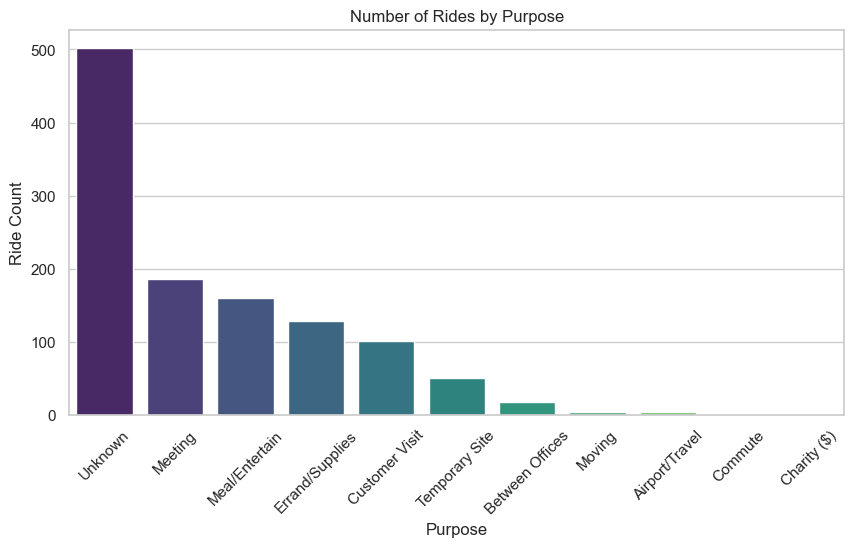

In [30]:
purpose_count = df["PURPOSE"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(
    x=purpose_count.index,
    y=purpose_count.values,
    palette="viridis"
)

plt.title("Number of Rides by Purpose")
plt.xlabel("Purpose")
plt.ylabel("Ride Count")
plt.xticks(rotation=45)
plt.savefig("images/rides_by_purpose.png", bbox_inches="tight")
plt.show()

----- Insights -----
- A large number of trips are marked as “Unknown”, which indicates missing purpose information by users.
- Most of the rides are business-related rather than personal travel.
- Meetings and Meal/Entertainment are the two most common specific purposes.
- Commute and Charity rides are very rare in this dataset.

### 2) Rides by Time of Day

In [31]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df["TIME_OF_DAY"] = df["HOUR"].apply(time_of_day)

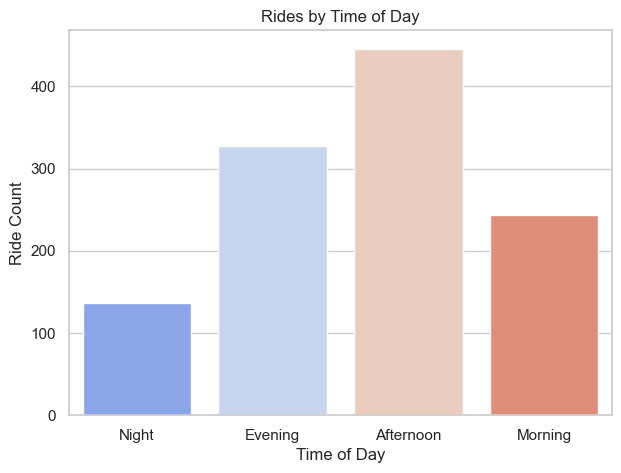

In [32]:
plt.figure(figsize=(7,5))
sns.countplot(x="TIME_OF_DAY", data=df, palette="coolwarm")

plt.title("Rides by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Ride Count")
plt.savefig("images/rides_by_time_of_day.png", bbox_inches="tight")
plt.show()

----- Insights -----
- Most rides occur in the afternoon and evening periods.
- Night-time ride usage is very low.
- Morning rides remain moderate, likely due to office and meeting travel.

### 3) Rides by Month

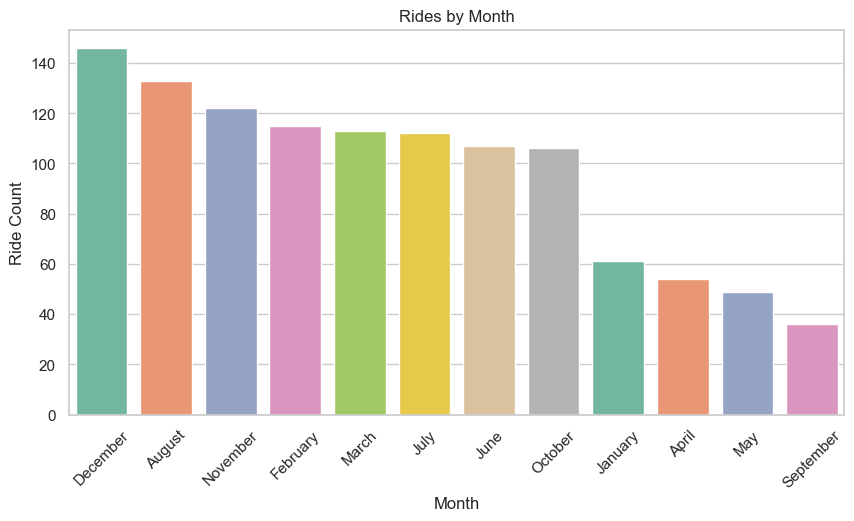

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x="MONTH", data=df, order=df["MONTH"].value_counts().index, palette="Set2")

plt.title("Rides by Month")
plt.xlabel("Month")
plt.ylabel("Ride Count")
plt.xticks(rotation=45)
plt.savefig("images/rides_by_month.png", bbox_inches="tight")
plt.show()

In [34]:
print("----- Insights -----")
df["MONTH"].value_counts()

----- Insights -----


MONTH
December     146
August       133
November     122
February     115
March        113
July         112
June         107
October      106
January       61
April         54
May           49
September     36
Name: count, dtype: int64

### 4) Rides by Weekday

WEEKDAY
Friday       206
Tuesday      175
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: count, dtype: int64


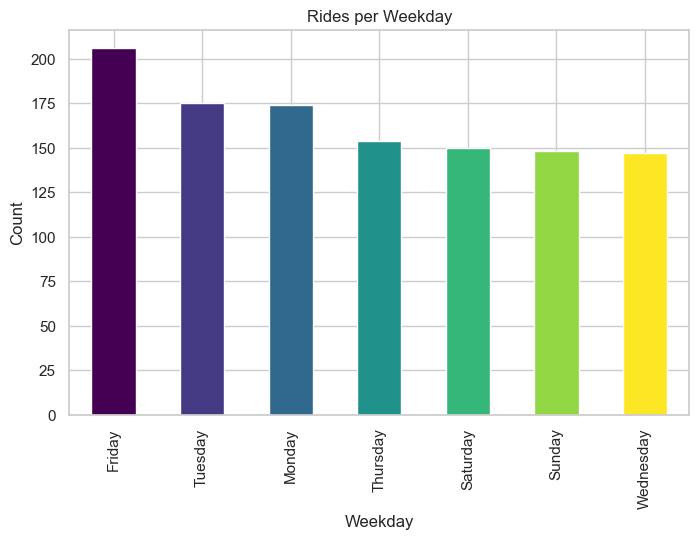

In [35]:
weekday_count = df["WEEKDAY"].value_counts()
print(weekday_count)
cmap = plt.get_cmap('viridis')

weekday_count.plot(kind="bar", color=cmap(np.linspace(0, 1, len(weekday_count))), figsize=(8,5))
plt.title("Rides per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.savefig("images/rides_by_weekday.png", bbox_inches="tight")
plt.show()

----- Insights -----
- Friday records the highest number of rides compared to all other days.
- Weekdays have higher ride activity than weekends, showing stronger business usage.
- Wednesday has the least number of rides, indicating lower travel demand.

### 5) Rides by Hour

HOUR
0     19
1      5
2      2
3      3
5      4
6      4
7     13
8     35
9     51
10    65
11    72
12    77
13    94
14    89
15    98
16    88
17    95
18    94
19    68
20    71
21    51
22    31
23    25
Name: count, dtype: int64


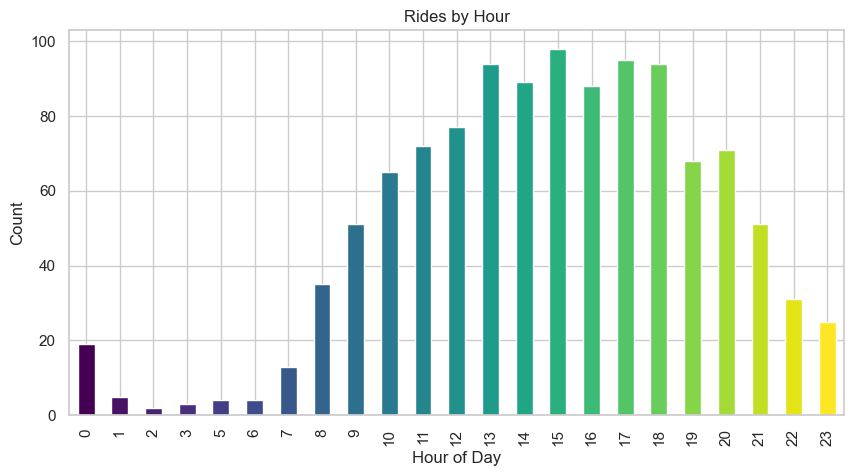

In [36]:
hour_count = df["HOUR"].value_counts().sort_index()
print(hour_count)
cmap = plt.get_cmap('viridis')

hour_count.plot(kind="bar", color=cmap(np.linspace(0, 1, len(hour_count))), figsize=(10,5))
plt.title("Rides by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.savefig("images/rides_by_hour.png", bbox_inches="tight")
plt.show()

In [37]:
print("----- Insights -----")
print("Peak ride hour:", hour_count.idxmax())
print('''\n- Most people take rides in the afternoon, with 3 PM being the busiest hour of the day.
- Early morning hours (midnight to 6 AM) are quiet, with very few rides happening.
- Ride activity builds steadily from morning and stays strong until early evening.''')

----- Insights -----
Peak ride hour: 15

- Most people take rides in the afternoon, with 3 PM being the busiest hour of the day.
- Early morning hours (midnight to 6 AM) are quiet, with very few rides happening.
- Ride activity builds steadily from morning and stays strong until early evening.


### 6) Miles vs Purpose

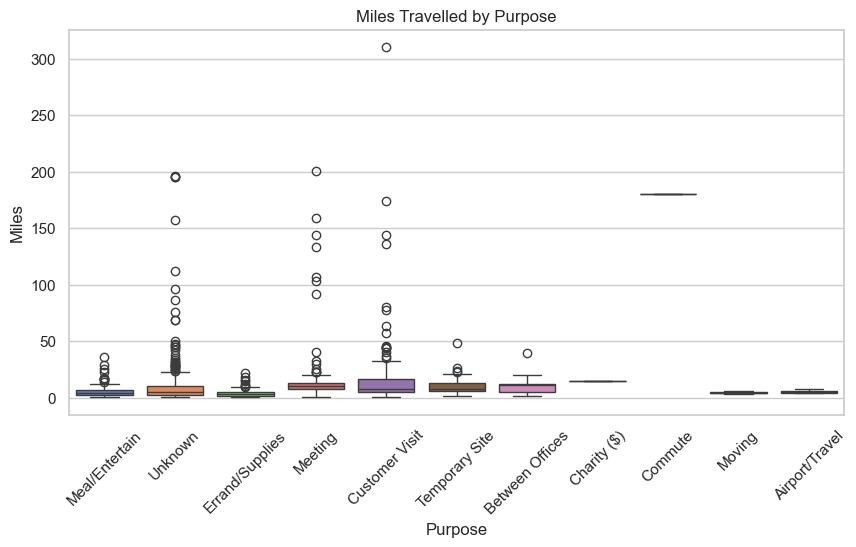

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x="PURPOSE", y="MILES", data=df, palette="muted")

plt.title("Miles Travelled by Purpose")
plt.xlabel("Purpose")
plt.ylabel("Miles")
plt.xticks(rotation=45)
plt.savefig("images/miles_vs_purpose.png", bbox_inches="tight")
plt.show()

----- Insights -----
- Meeting and Customer Visit trips usually involve higher travel distance.
- Airport/Travel rides show the longest distances, including extreme long-distance trips.
- Most other purposes involve short city rides with a few high-miles outliers.

### 7) Trip Duration Distribution

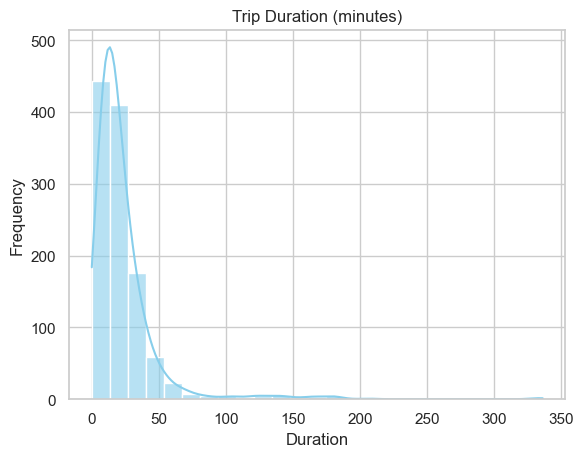

In [39]:
sns.histplot(df["DURATION_MIN"], bins=25, kde=True, alpha=0.6, color='skyblue')
plt.title("Trip Duration (minutes)")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.savefig("images/trip_duration_distribution.png", bbox_inches="tight")
plt.show()

In [40]:
print("----- Insights -----")
print("Avg duration:", round(df["DURATION_MIN"].mean(),2), "min")
print("Max duration:", round(df["DURATION_MIN"].max(),2), "min")
print('''\n- Most rides are short-duration trips under 40 minutes.
- A small number of trips last for a very long time, forming visible right-side tail.
- The distribution is highly right-skewed due to these long-duration trips.''')

----- Insights -----
Avg duration: 23.24 min
Max duration: 336.0 min

- Most rides are short-duration trips under 40 minutes.
- A small number of trips last for a very long time, forming visible right-side tail.
- The distribution is highly right-skewed due to these long-duration trips.


### 8) Heatmap of Ride Demand (Weekdays vs Hours)

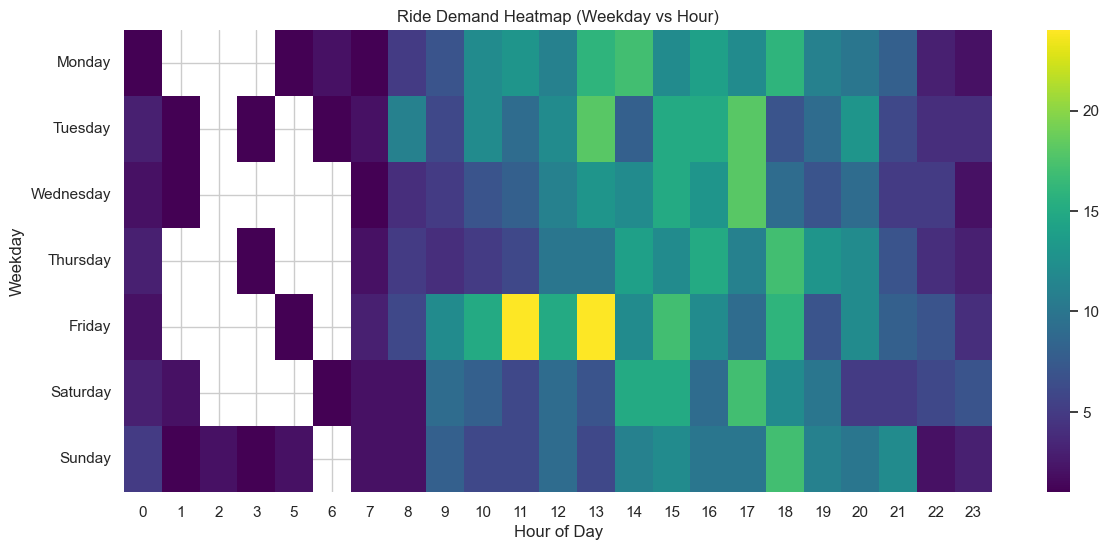

In [41]:
# create pivot table
heatmap_data = df.pivot_table(
    index="WEEKDAY",
    columns="HOUR",
    values="MILES",
    aggfunc="count"
)

# reorder weekdays logically
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
heatmap_data = heatmap_data.reindex(order)

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="viridis")
plt.title("Ride Demand Heatmap (Weekday vs Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")
plt.savefig("images/heatmap_of_ride_demand_(weekdays_vs_hours).png", bbox_inches="tight")
plt.show()

----- Insights -----
- Ride demand peaks late morning to early afternoon, especially on Fridays between 11 AM and 1 PM.
- Weekdays tend to be much busier during the day, while weekends are quieter and less predictable.
- There’s a clear weekday pattern, with rides regularly picking up around midday from Monday through Friday.

### 9) Outliers in Trip Duration

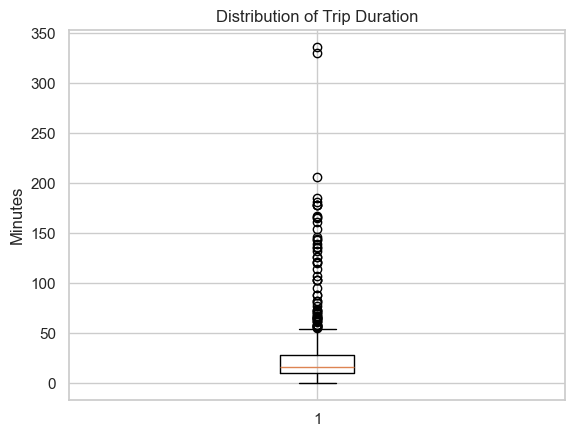

In [42]:
plt.boxplot(df["DURATION_MIN"].dropna())
plt.title("Distribution of Trip Duration")
plt.ylabel("Minutes")
plt.savefig("images/outliers_in_trip_duration.png", bbox_inches="tight")
plt.show()

----- Insights -----
- Many rides fall within a short duration range, but strong outliers exist.
- Outliers represent very long business trips or highway travel.
- The presence of many outliers indicates high variation in how Uber is used.

### 10) Total & Avg Miles

In [43]:
print("Total miles:", df["MILES"].sum())
print("Avg miles per ride:", round(df["MILES"].mean(),2))

Total miles: 12194.800000000001
Avg miles per ride: 10.57


### 11) Top Start Locations

In [44]:
if "START" in df.columns:
    top_starts = df["START"].value_counts().head(10)
    print(top_starts)

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               36
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64


## Business Insights Summary
- Uber rides are mainly used for business purposes such as meetings and customer visits.
- Ride demand is highest during weekdays, especially Fridays.
- Peak hours fall between late morning and afternoon.
- Most trips are short in duration, but a few long-distance trips exist as outliers.
- Airport and Customer Visit trips usually cover the maximum miles.
- Demand during late nights and early mornings remains consistently low.

## Business Recommendations:
- Increase driver availability during weekday afternoons and evenings.
- Deploy more drivers near business hubs and airports.
- Offer discounts or promos during weekends to boost demand.
- Encourage shared rides for long long-distance airport and intercity trips.
- Improve ETA accuracy during peak hours to reduce cancellations.
